<a href="https://colab.research.google.com/github/AuFeld/DS-Unit-1-Sprint-2-Statistics/blob/master/module2/Chase_Goldfeld_DS_122_Sampling_Confidence_Intervals_and_Hypothesis_Testing_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment - Build a confidence interval

A confidence interval refers to a neighborhood around some point estimate, the size of which is determined by the desired p-value. For instance, we might say that 52% of Americans prefer tacos to burritos, with a 95% confidence interval of +/- 5%.

52% (0.52) is the point estimate, and +/- 5% (the interval $[0.47, 0.57]$) is the confidence interval. "95% confidence" means a p-value $\leq 1 - 0.95 = 0.05$.

In this case, the confidence interval includes $0.5$ - which is the natural null hypothesis (that half of Americans prefer tacos and half burritos, thus there is no clear favorite). So in this case, we could use the confidence interval to report that we've failed to reject the null hypothesis.

But providing the full analysis with a confidence interval, including a graphical representation of it, can be a helpful and powerful way to tell your story. Done well, it is also more intuitive to a layperson than simply saying "fail to reject the null hypothesis" - it shows that in fact the data does *not* give a single clear result (the point estimate) but a whole range of possibilities.

How is a confidence interval built, and how should it be interpreted? It does *not* mean that 95% of the data lies in that interval - instead, the frequentist interpretation is "if we were to repeat this experiment 100 times, we would expect the average result to lie in this interval ~95 times."

For a 95% confidence interval and a normal(-ish) distribution, you can simply remember that +/-2 standard deviations contains 95% of the probability mass, and so the 95% confidence interval based on a given sample is centered at the mean (point estimate) and has a range of +/- 2 (or technically 1.96) standard deviations.

Different distributions/assumptions (90% confidence, 99% confidence) will require different math, but the overall process and interpretation (with a frequentist approach) will be the same.

Your assignment - using the data from the prior module ([congressional voting records](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)):


### Confidence Intervals:
1. Generate and numerically represent a confidence interval
2. Graphically (with a plot) represent the confidence interval
3. Interpret the confidence interval - what does it tell you about the data and its distribution?

### Chi-squared tests:
4. Take a dataset that we have used in the past in class that has **categorical** variables. Pick two of those categorical variables and run a chi-squared tests on that data
  - By hand using Numpy
  - In a single line using Scipy


In [0]:
# import tools
from scipy import stats
import seaborn as sns
from scipy.stats import t, ttest_1samp
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [0]:
# import data

In [0]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data

--2019-11-05 20:45:04--  https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18171 (18K) [application/x-httpd-php]
Saving to: ‘house-votes-84.data’

house-votes-84.data 100%[===================>]  17.75K  --.-KB/s    in 0.06s   

2019-11-05 20:45:04 (282 KB/s) - ‘house-votes-84.data’ saved [18171/18171]



In [0]:
column_headers = ['party', 'handicapped-infants', 'water-project', 
                  'budget', ' physican-fee-freeze', 'el-salvador-aid',
                  'religious-groups', 'anti-satellite-ban', 
                  'aid-to-contras', 'mx-missle', 'immigration', 
                  'synfuels', 'education', 'right-to-sue', 'crime', 'duty-free', 
                  'south-africa']

df = pd.read_csv('house-votes-84.data', header=None, names=column_headers, na_values="?")

In [0]:
df = df.replace({'y': 1, 'n': 0})

In [0]:
df = df.dropna()

In [0]:
#1: Generate and numerically represent a confidence interval

In [0]:
rep = df[df['party']=='republican']

dem = df[df['party']=='democrat']

In [0]:
# assign variable

In [0]:
data = df['water-project']

In [0]:
def confidence_interval(data, confidence=0.95):
  data = np.array(data)
  mean = np.mean(data)
  n = len(data)
  stderr = np.std(data, ddof=1)/np.sqrt(n)
  moe = stderr * stats.t.ppf((1 + confidence) / 2.0, n - 1)
  return (mean - moe, mean, mean + moe)

In [0]:
confidence_interval(data, confidence=0.95)

(0.3965846075395787, 0.46120689655172414, 0.5258291855638696)

In [0]:
#2: Graphically (with a plot) represent the confidence interval

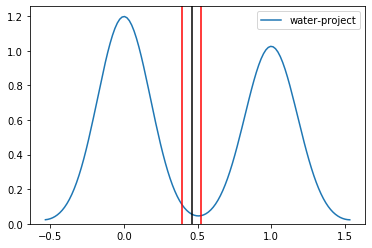

In [0]:
sns.kdeplot(data)
CI = confidence_interval(data)
plt.axvline(x=CI[0], color='red')
plt.axvline(x=CI[2], color='red')
plt.axvline(x=CI[1], color='k');

In [0]:
#3: Interpret the confidence interval - what does it tell you about the data 
#   and its distribution?

In [0]:
data_means = []
for x in range(0,431):
    data = np.random.binomial(n=1, p=0.5, size=30)
    data_means.append(data.mean())
  
print(data_means)

[0.4666666666666667, 0.4666666666666667, 0.5, 0.5333333333333333, 0.4666666666666667, 0.6, 0.43333333333333335, 0.36666666666666664, 0.43333333333333335, 0.6, 0.5333333333333333, 0.6666666666666666, 0.4666666666666667, 0.5666666666666667, 0.5333333333333333, 0.5, 0.5666666666666667, 0.4666666666666667, 0.4666666666666667, 0.5666666666666667, 0.23333333333333334, 0.43333333333333335, 0.36666666666666664, 0.6, 0.6, 0.5, 0.3, 0.5666666666666667, 0.7, 0.5333333333333333, 0.4666666666666667, 0.5333333333333333, 0.26666666666666666, 0.4666666666666667, 0.4666666666666667, 0.5, 0.4666666666666667, 0.5666666666666667, 0.5, 0.6, 0.4, 0.5666666666666667, 0.6333333333333333, 0.3, 0.6333333333333333, 0.43333333333333335, 0.4, 0.5666666666666667, 0.6, 0.5666666666666667, 0.36666666666666664, 0.5333333333333333, 0.6666666666666666, 0.36666666666666664, 0.36666666666666664, 0.4666666666666667, 0.5333333333333333, 0.5, 0.3333333333333333, 0.7, 0.4666666666666667, 0.3333333333333333, 0.4333333333333333

In [0]:
n = len(data_means)
dof = n-1
mean = np.mean(data_means)
data_std = np.std(data_means, ddof=1)
std_err = data_std/n**0.5

CI = t.interval(0.95, dof, loc=mean, scale=std_err)
print("95% Confidence Interval: ", CI)

95% Confidence Interval:  (0.4907930839528448, 0.5084335208422055)


In [0]:
# 95% confidence interval

t_stat = t.ppf(0.975, dof)
print("t Statistic:", t_stat)

CI = (mean-(t_stat*std_err), mean+(t_stat*std_err))
print("Confidence Interval", CI)

t Statistic: 1.9654961915712994
Confidence Interval (0.4907930839528448, 0.5084335208422055)


In [0]:
ttest_1samp(data_means, 0.490)

Ttest_1sampResult(statistic=2.142226903932844, pvalue=0.032736242377838086)

In [0]:
# Our sample mean of Dems and Reps regarding the "Water-Project" falls inside 
# of our confidence interval will fail to reject our null hypothesis.

In [0]:
#4: Take a dataset that we have used in the past in class that has categorical 
#   variables. Pick two of those categorical variables and run a chi-squared 
#   tests on that data by: 
#     1. hand using Numpy
#     2. in a single line using Scipy

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/adult.csv', na_values=" ?")
print(df.shape)
df.head()

(32561, 15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [4]:
df.describe(exclude='number')

,workclass,education,marital-status,occupation,relationship,race,sex,country,salary
count,30725,32561,32561,30718,32561,32561,32561,31978,32561
unique,8,16,7,14,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


In [5]:
# I NEED CATEGORICAL VARIABLES TO DO A CHI^2 TEST

cut_points = [0, 9, 19, 29, 39, 49, 1000]
label_names = ['0-9', '10-19', '20-29', '30-39', '40-49', '50+']
df['hours_per_week_categories'] = pd.cut(df['hours-per-week'], cut_points, labels=label_names)

df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary,hours_per_week_categories
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,40-49
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,10-19
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,40-49
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,40-49
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,40-49


In [6]:
df['sex'].value_counts()

 Male      21790
 Female    10771
Name: sex, dtype: int64

In [7]:
df['hours_per_week_categories'].value_counts()

40-49    18336
50+       6462
30-39     3667
20-29     2392
10-19     1246
0-9        458
Name: hours_per_week_categories, dtype: int64

In [8]:
contingency_table = pd.crosstab(df['sex'], df['hours_per_week_categories'], margins=True)

contingency_table

hours_per_week_categories,0-9,10-19,20-29,30-39,40-49,50+,All
sex,,,,,,,
Female,235,671,1287,1914,5636,1028,10771
Male,223,575,1105,1753,12700,5434,21790
All,458,1246,2392,3667,18336,6462,32561


In [9]:
observed = pd.crosstab(df['sex'], df['hours_per_week_categories'])

observed

hours_per_week_categories,0-9,10-19,20-29,30-39,40-49,50+
sex,,,,,,
Female,235,671,1287,1914,5636,1028
Male,223,575,1105,1753,12700,5434


In [10]:
chi_squared, p_value, dof, expected = stats.chi2_contingency(observed)

print(f"Chi-Squared: {chi_squared}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}") 
print("Expected: \n", np.array(expected))

Chi-Squared: 2287.190943926107
P-value: 0.0
Degrees of Freedom: 5
Expected: 
 [[  151.50388502   412.16995793   791.26046497  1213.02346365
   6065.44811277  2137.59411566]
 [  306.49611498   833.83004207  1600.73953503  2453.97653635
  12270.55188723  4324.40588434]]


In [0]:
# Run a Chi Squared Test "by hand" using Numpy

In [11]:
contingency_table = pd.crosstab(df['sex'], df['hours_per_week_categories'], margins=True)

contingency_table

hours_per_week_categories,0-9,10-19,20-29,30-39,40-49,50+,All
sex,,,,,,,
Female,235,671,1287,1914,5636,1028,10771
Male,223,575,1105,1753,12700,5434,21790
All,458,1246,2392,3667,18336,6462,32561


In [12]:
# Grab the crosstab cells that correspond to the females
femalecount = contingency_table.iloc[0][0:6].values
femalecount

array([ 235,  671, 1287, 1914, 5636, 1028])

In [13]:
# Grab the crosstab cells that correspond to the males
malecount = contingency_table.iloc[1][0:6].values
malecount

array([  223,   575,  1105,  1753, 12700,  5434])

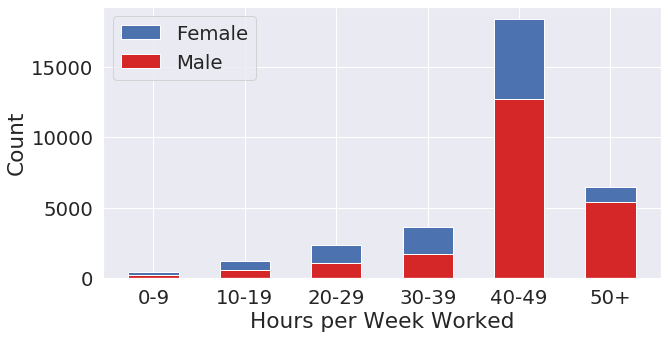

In [14]:
# In this bar chart we can eyeball the dependence between these two variables
# If these two variables were independent, we would expect the proportions of 
# red and blue to be consistent throughout the bars. This is not what we see.
fig = plt.figure(figsize=(10, 5))
sns.set(font_scale=1.8)
categories = ["0-9","10-19","20-29","30-39","40-49","50+"]
p1 = plt.bar(categories, malecount, 0.55, color='#d62728')
p2 = plt.bar(categories, femalecount, 0.55, bottom=malecount)
plt.legend((p2[0], p1[0]), ('Female', 'Male'))
plt.xlabel('Hours per Week Worked')
plt.ylabel('Count')
plt.show()

In [0]:
# Expected Value Caluclation

In [15]:
# Calculate row and column totals to use in the expected value calculations
row_sums = contingency_table.iloc[0:2, 6].values
col_sums = contingency_table.iloc[2, 0:6].values

print(row_sums)
print(col_sums)

[10771 21790]
[  458  1246  2392  3667 18336  6462]


In [16]:
total = contingency_table.loc['All','All']
total

32561

In [17]:
expected = []
for i in range(len(row_sums)):
  expected_row = []
  for column in col_sums:
    expected_val = column*row_sums[i]/total
    expected_row.append(expected_val)
  expected.append(expected_row)
  
expected = np.array(expected)

# The shape of our table should match our contingency table
print(expected.shape)  
# The expected table here should match the table reported by scipy, or else
# we have made a mistake.
print(expected)

(2, 6)
[[  151.50388502   412.16995793   791.26046497  1213.02346365
   6065.44811277  2137.59411566]
 [  306.49611498   833.83004207  1600.73953503  2453.97653635
  12270.55188723  4324.40588434]]


In [18]:
# our observed table comes from the contingency table (crosstab) 
# without the margins

observed = pd.crosstab(df['sex'], df['hours_per_week_categories']).values
print(observed.shape)
observed

(2, 6)


array([[  235,   671,  1287,  1914,  5636,  1028],
       [  223,   575,  1105,  1753, 12700,  5434]])

In [19]:
# numpy array broadcasting allows us to write code that looks a lot like the 
# equation above.

# Array broadcasting will work with numpy arrays but not python lists
chi_squared = ((observed - expected)**2/(expected)).sum() 
print(f"Chi-Squared: {chi_squared}")
# Our chi^2 statistic should match what was caculated by scipy -it does. 

Chi-Squared: 2287.190943926107


In [20]:
# Degrees of Freedom of a Chi-squared test

#degrees_of_freedom = (num_rows - 1)(num_columns - 1)

# Calculate Degrees of Freedom
dof = (len(row_sums)-1)*(len(col_sums)-1)
print(f"Degrees of Freedom: {dof}")

Degrees of Freedom: 5


In [21]:
from scipy.stats.distributions import chi2

print("P-value from chi^2 statistic:", chi2.sf(chi_squared, 5))

P-value from chi^2 statistic: 0.0


In [0]:
# TODO - your code!

## Stretch goals:

1. Write a summary of your findings, mixing prose and math/code/results. *Note* - yes, this is by definition a political topic. It is challenging but important to keep your writing voice *neutral* and stick to the facts of the data. Data science often involves considering controversial issues, so it's important to be sensitive about them (especially if you want to publish).
2. Apply the techniques you learned today to your project data or other data of your choice, and write/discuss your findings here.
3. Refactor your code so it is elegant, readable, and can be easily run for all issues.

## Resources

- [Interactive visualize the Chi-Squared test](https://homepage.divms.uiowa.edu/~mbognar/applets/chisq.html)
- [Calculation of Chi-Squared test statistic](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test)
- [Visualization of a confidence interval generated by R code](https://commons.wikimedia.org/wiki/File:Confidence-interval.svg)
- [Expected value of a squared standard normal](https://math.stackexchange.com/questions/264061/expected-value-calculation-for-squared-normal-distribution) (it's 1 - which is why the expected value of a Chi-Squared with $n$ degrees of freedom is $n$, as it's the sum of $n$ squared standard normals)